# 2018 BERT

[2018 BERT](https://arxiv.org/abs/1810.04805)
BERT, a bidirectional transformer, achieved impressive NLP results using global attention and combined training objectives.

With BERT (Bidirectional Encoder Representations from Transformers), we can focus on the following key aspects:

1. **Introduction to BERT**: Briefly describe BERT, its architecture, and its training objectives.
2. **Using BERT for NLP Tasks**: Demonstrate how to use a pre-trained BERT model for common NLP tasks like sentence classification or named entity recognition (NER).
3. **Visualization**: Visualize embeddings generated by BERT or showcase how BERT's attention mechanism works.
4. **Code Implementation**: Include code examples using the Hugging Face `transformers` library to perform these tasks.

### Notebook Outline

#### 1. Introduction to BERT
- **Description**: BERT is a transformer-based model pre-trained on a large corpus of text using two training objectives: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). Its bidirectional nature allows it to understand context from both left and right sides of a word.
- **Key Points**:
  - BERT is pre-trained in a self-supervised manner.
  - Fine-tuning BERT on specific tasks leads to state-of-the-art performance in many NLP benchmarks.

#### 2. Loading and Using BERT for NLP Tasks
- **Load Pre-trained BERT**: Show how to load a pre-trained BERT model and tokenizer.
- **Text Classification Example**: Demonstrate how to use BERT for text classification.
- **Named Entity Recognition Example**: Optionally include an example of using BERT for NER.

#### 3. Visualizing BERT's Embeddings and Attention
- **Embeddings**: Extract and visualize the embeddings generated by BERT.
- **Attention**: Visualize BERT's attention mechanism to understand how it processes input text.

#### 4. Code Implementation
Include code for each of the sections mentioned above.

/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Input: The movie was fantastic!
Logits: tensor([[ 0.0495, -0.0754]])
Probabilities: tensor([[0.5312, 0.4688]])


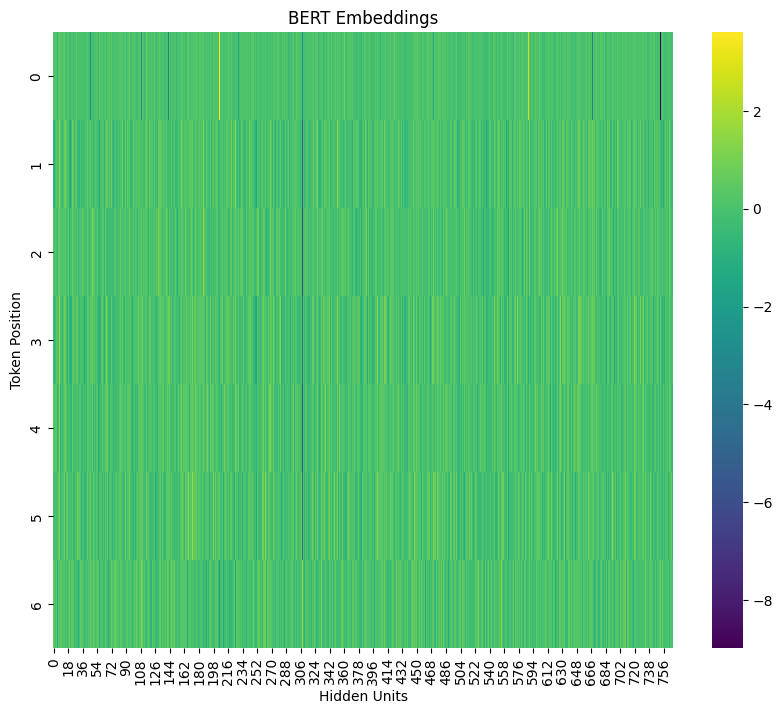

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


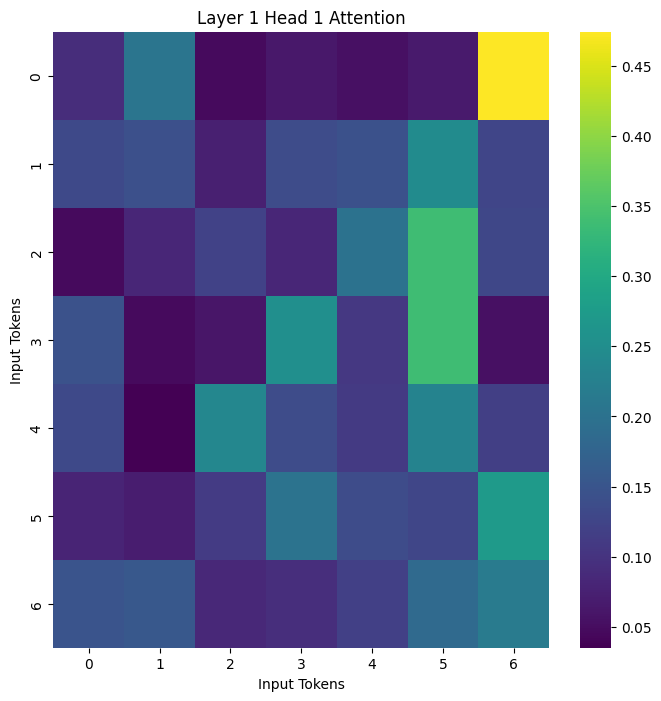

In [1]:
### Step-by-Step Code Example for BERT

#### Import Libraries
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load Pre-trained BERT

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

#### Text Classification Example

# Define input text for classification
input_text = "The movie was fantastic!"

# Tokenize input text and get token IDs
inputs = tokenizer(input_text, return_tensors='pt')

# Pass the token IDs through the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract the classification logits
logits = outputs.logits

# Apply softmax to get probabilities
probs = torch.nn.functional.softmax(logits, dim=-1)

# Print the results
print(f"Input: {input_text}")
print(f"Logits: {logits}")
print(f"Probabilities: {probs}")

#### Visualizing BERT's Embeddings

# Load pre-trained BERT model for embeddings
model = BertModel.from_pretrained('bert-base-uncased')

# Get the last hidden state from the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract embeddings from the last hidden state
embeddings = outputs.last_hidden_state.squeeze().numpy()

# Visualize the embeddings using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(embeddings, cmap='viridis')
plt.title('BERT Embeddings')
plt.xlabel('Hidden Units')
plt.ylabel('Token Position')
plt.show()

#### Visualizing BERT's Attention Mechanism

# Load BERT model with output_attentions=True
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Get attentions from the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract attention weights
attentions = outputs.attentions  # List of tensors for each layer

# Visualize attention for a specific layer and head
def plot_attention_weights(attn_weights, layer=0, head=0):
    attn_for_head = attn_weights[layer][0][head].detach().numpy()
    plt.figure(figsize=(8, 8))
    sns.heatmap(attn_for_head, cmap='viridis')
    plt.title(f'Layer {layer+1} Head {head+1} Attention')
    plt.xlabel('Input Tokens')
    plt.ylabel('Input Tokens')
    plt.show()

# Visualize the attention from the first layer and the first head
plot_attention_weights(attentions, layer=0, head=0)


### Summary and Next Steps

- **Summary**: This notebook demonstrates how to use BERT for text classification, visualize token embeddings, and interpret the attention mechanism.
- **Next Steps**: Expand the notebook to include other NLP tasks like NER or Question Answering using BERT. Explore using different BERT variants like `bert-large` or fine-tuning BERT on a specific dataset.

This notebook covers a broad overview of how to use and visualize BERT, leveraging the pre-trained models and tokenizers provided by the Hugging Face `transformers` library.

### Explanation
- Loading the Tokenizer and Model: We use a pre-trained BERT model fine-tuned on the CoNLL-2003 NER dataset. This model (dbmdz/bert-large-cased-finetuned-conll03-english) is designed for recognizing entities like locations, organizations, and personal names.
- Tokenizing the Input: The input text is tokenized into word pieces using the tokenizer, converting the text into a sequence of token IDs.
- Making Predictions: The token IDs are passed through the model, which outputs logits for each token, indicating the likelihood of each token belonging to one of the NER classes.
- Extracting Predicted Labels: The logits are converted into predicted indices, and these indices are mapped to their corresponding NER labels using the model’s configuration.
- Output: The tokens and their predicted labels are printed, showing the NER results.

## NER

To identify entities and relationships from a larger body of text, you can use BERT for Named Entity Recognition (NER) and then extract potential relationships between the identified entities. Here's a step-by-step guide to accomplish this:

#### 1. **NER with BERT**: 

First, use BERT to identify entities within the text. We'll categorize these entities (e.g., persons, organizations, locations).

#### 2. **Extracting Relationships**: 

Once entities are identified, we can use simple rules or a dependency parser to identify relationships between entities based on their context in the sentence.

#### 3. **Visualization**: Optionally, you can visualize these entities and relationships using a library like `networkx` for graph representations or `spacy` for dependency parsing.

#### Step 1: Load BERT for NER and Tokenize Larger Text



In [35]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

# Load pre-trained BERT tokenizer and model for NER
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')
model = BertForTokenClassification.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')

# Define a larger input text for NER
input_text = """
Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge.
Google LLC, located in Mountain View, California, is known for its search engine and numerous other tech products.
Elon Musk, the CEO of SpaceX and Tesla, has announced a new project in collaboration with NASA.
"""

# Tokenize the input text and get token IDs
inputs = tokenizer(input_text, return_tensors='pt', truncation=True, padding=True)

# Pass the token IDs through the model
outputs = model(**inputs)

# Get the predicted token classes (logits) and convert them to predicted indices
predictions = torch.argmax(outputs.logits, dim=2)

# Map predicted indices to NER labels
ner_tags = model.config.id2label

# Decode tokens and extract labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
predicted_labels = [ner_tags[pred] for pred in predictions.squeeze().tolist()]

# Extract and print entities with improved handling for sub-tokens and multi-word entities
entities = []
current_entity = ""
current_label = ""
for token, label in zip(tokens, predicted_labels):
    if label != 'O':
        # Handle sub-tokens by concatenating them
        if token.startswith('##'):
            current_entity += token[2:]  # Append sub-token to the current entity
        else:
            if current_entity and current_label == label:  # Continue the current entity
                current_entity += " " + token
            else:  # Start a new entity
                if current_entity:  # If there's an ongoing entity, add it to the entities list
                    entities.append((current_entity, current_label))
                current_entity = token
                current_label = label
    else:
        if current_entity:  # If not an entity and there's an ongoing entity, store it
            entities.append((current_entity, current_label))
            current_entity = ""
            current_label = ""

# Add the last entity if any
if current_entity:
    entities.append((current_entity, current_label))

# Print the entities
for entity, label in entities:
    print(f"{entity}: {label}")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Hugging Face Inc: I-ORG
New York City: I-LOC
DUMBO: I-LOC
Manhattan Bridge: I-LOC
Google LLC: I-ORG
Mountain View: I-LOC
California: I-LOC
Elon Musk: I-PER
SpaceX: I-ORG
Tesla: I-ORG
NASA: I-ORG


### Step 2: Extracting Relationships
You can extract relationships between entities based on their sentence context. For this, you can use simple rules or advanced methods like dependency parsing. Here, we'll use a basic approach to group entities within the same sentence.



In [61]:
import spacy

# Load SpaCy model for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Parse the text into sentences using SpaCy
doc = nlp(input_text)

# Extract entities and map them to their sentence
entity_dict = {entity.text: entity.label_ for entity in doc.ents}

# Extract relationships using dependency parsing
relationships = []
for sent in doc.sents:
    entities_in_sentence = [ent for ent in doc.ents if ent.sent == sent]
    for token in sent:
        if token.pos_ == 'VERB':
            # Identify subjects and objects of the verb within the same sentence
            subject = [w for w in token.lefts if w.dep_ in ('nsubj', 'nsubjpass', 'attr', 'poss')]
            objects = [w for w in token.rights if w.dep_ in ('dobj', 'attr', 'prep', 'pobj', 'advmod')]

            # Expand the object to include prepositional phrases
            more_info = []
            for obj in objects:
                more_info.extend([child for child in obj.subtree if child.dep_ in ('pobj', 'compound', 'nmod')])

            # Construct subject and object entities
            subj_entity = ' '.join([w.text for w in subject])
            obj_entity = ' '.join([w.text for w in objects + more_info])

            # Try to match entities within the same sentence
            subj_full_entity = next((ent.text for ent in entities_in_sentence if subj_entity in ent.text), subj_entity)
            obj_full_entity = next((ent.text for ent in entities_in_sentence if obj_entity in ent.text), obj_entity)

            # Use the original verb form from the text instead of the lemma
            verb_text = token.text

            # Add relationships if both subject and object are found and are not redundant
            if subj_full_entity and obj_full_entity and subj_full_entity != obj_full_entity:
                relationships.append((subj_full_entity, verb_text, obj_full_entity))

# Print the extracted entities
print("Entities:")
for entity, label in entity_dict.items():
    print(f"{entity}: {label}")

# Print the enhanced relationships
print("\nEnhanced Extracted Relationships:")
for subj, rel, obj in relationships:
    print(f"{subj} -> {rel} -> {obj}")


Entities:
Hugging Face Inc.: ORG
New York City: GPE
DUMBO: ORG
the Manhattan Bridge: FAC
Google LLC: ORG
Mountain View: GPE
California: GPE
Elon Musk: PERSON
SpaceX: NORP
Tesla: ORG
NASA: ORG

Enhanced Extracted Relationships:
Hugging Face Inc. -> based -> in New York City
Google LLC -> located -> in Mountain View
Google LLC -> known -> for search engine tech
Elon Musk -> announced -> project collaboration NASA


### Step 3: Visualizing Entities and Relationships
You can use libraries like `networkx` to create a graph representation of entities and their relationships.

Entities:
Hugging Face Inc.: ORG
New York City: GPE
DUMBO: ORG
the Manhattan Bridge: FAC
Google LLC: ORG
Mountain View: GPE
California: GPE
Elon Musk: PERSON
SpaceX: NORP
Tesla: ORG
NASA: ORG

Enhanced Extracted Relationships:
Google LLC -> known -> for search engine tech
Hugging Face Inc. -> based -> in New York City
Google LLC -> located -> in Mountain View
Elon Musk -> announced -> project collaboration NASA


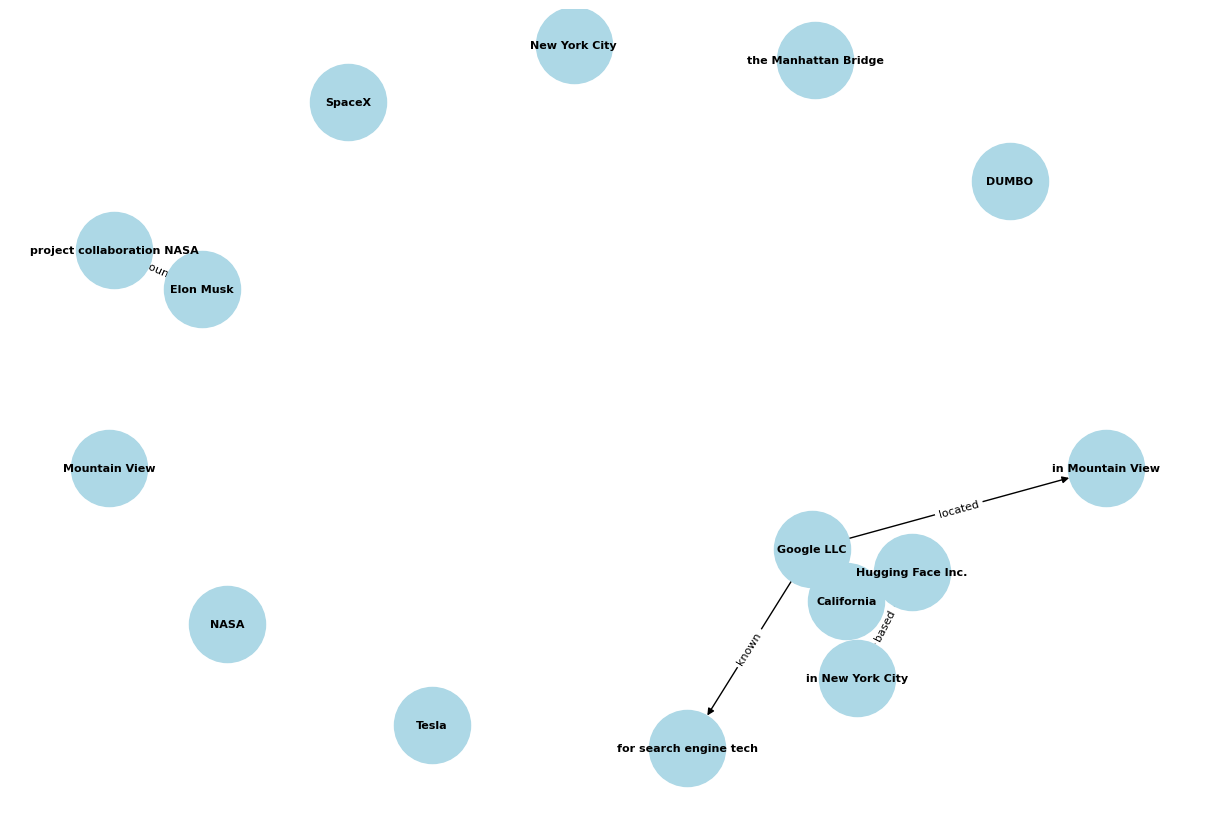

In [64]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load SpaCy model for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Define input text
input_text = """
Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge.
Google LLC, located in Mountain View, California, is known for its search engine and numerous other tech products.
Elon Musk, the CEO of SpaceX and Tesla, has announced a new project in collaboration with NASA.
"""

# Parse the text into sentences using SpaCy
doc = nlp(input_text)

# Extract entities and map them to their sentence
entity_dict = {entity.text: entity.label_ for entity in doc.ents}

# Extract relationships using dependency parsing
relationships = set()
for sent in doc.sents:
    entities_in_sentence = [ent for ent in doc.ents if ent.sent == sent]
    for token in sent:
        if token.pos_ == 'VERB':
            # Identify subjects and objects of the verb within the same sentence
            subject = [w for w in token.lefts if w.dep_ in ('nsubj', 'nsubjpass', 'attr', 'poss')]
            objects = [w for w in token.rights if w.dep_ in ('dobj', 'attr', 'prep', 'pobj', 'advmod')]

            # Expand the object to include prepositional phrases
            more_info = []
            for obj in objects:
                more_info.extend([child for child in obj.subtree if child.dep_ in ('pobj', 'compound', 'nmod')])

            # Construct subject and object entities
            subj_entity = ' '.join([w.text for w in subject])
            obj_entity = ' '.join([w.text for w in objects + more_info])

            # Try to match entities within the same sentence
            subj_full_entity = next((ent.text for ent in entities_in_sentence if subj_entity in ent.text), subj_entity)
            obj_full_entity = next((ent.text for ent in entities_in_sentence if obj_entity in ent.text), obj_entity)

            # Use the original verb form from the text instead of the lemma
            verb_text = token.text

            # Add relationships if both subject and object are found and are not redundant
            if subj_full_entity and obj_full_entity and subj_full_entity != obj_full_entity:
                relationships.add((subj_full_entity, verb_text, obj_full_entity))

# Print the extracted entities
print("Entities:")
for entity, label in entity_dict.items():
    print(f"{entity}: {label}")

# Print the enhanced relationships
print("\nEnhanced Extracted Relationships:")
for subj, rel, obj in relationships:
    print(f"{subj} -> {rel} -> {obj}")

# Create a graph
G = nx.DiGraph()

# Add nodes and edges while ensuring uniqueness
for entity, label in entity_dict.items():
    G.add_node(entity, label=label)

for subj, rel, obj in relationships:
    G.add_edge(subj, obj, label=rel)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=8, font_weight='bold', node_size=3000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()


### Explanation

- **NER with BERT**: The code identifies entities in the larger text using the fine-tuned BERT model. It prints out tokens and their corresponding labels.
- **Extracting Relationships**: Using SpaCy for sentence segmentation, the code groups entities within the same sentence, which could indicate a relationship.
- **Visualization**: `networkx` is used to visualize entities and relationships, where each node represents an entity, and edges represent potential relationships.

### Enhancing Relationship Extraction

To improve the relationship extraction:
- Use dependency parsing to identify more complex relationships between entities.
- Implement custom rules or use pre-trained relationship extraction models to understand the nature of relationships (e.g., "works for," "located in").

This approach provides a simple way to identify entities and visualize potential relationships within a larger body of text using BERT.

In [26]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

# Load pre-trained BERT tokenizer and model for NER
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')
model = BertForTokenClassification.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')

# Define the input text for NER
input_text = """
Hugging Face Inc. is a company based in New York City. 
Elon Musk, the CEO of SpaceX and Tesla, has announced a new project in collaboration with NASA.
Jeff Bezos, the founder of Amazon, also visited New York last week.
"""

# Tokenize the input text and get token IDs
inputs = tokenizer(input_text, return_tensors='pt', truncation=True, padding=True)

# Pass the token IDs through the model
outputs = model(**inputs)

# Get the predicted token classes (logits) and convert them to predicted indices
predictions = torch.argmax(outputs.logits, dim=2)

# Map predicted indices to NER labels
ner_tags = model.config.id2label

# Decode tokens and extract labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
predicted_labels = [ner_tags[pred] for pred in predictions.squeeze().tolist()]

# Extract and print persons with improved handling for sub-tokens
persons = []
current_person = ""
for token, label in zip(tokens, predicted_labels):
    if label == 'B-PER' or (label == 'I-PER' and not current_person):
        # Start of a new person entity
        if current_person:  # If there was an ongoing person, add it to persons
            persons.append(current_person)
        current_person = token if not token.startswith('##') else token[2:]  # Handle sub-tokens starting with '##'
    elif label == 'I-PER' and current_person:
        # Continuation of the current person entity
        if token.startswith('##'):
            current_person += token[2:]  # Append without space if sub-token
        else:
            current_person += ' ' + token
    else:
        if current_person:  # If no longer in a person entity, store the current one
            persons.append(current_person)
            current_person = ""

# Handle the last person if any
if current_person:
    persons.append(current_person)

print("\nIdentified Persons:")
for person in persons:
    print(person)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Identified Persons:
Elon Musk
Jeff Bezos


### BERT Architecture
BERT is built on the Transformer architecture, which is based on self-attention mechanisms. The architecture consists of an encoder stack that processes the input text in a bidirectional manner. The key components include:

#### 1. **Input Representation:**
Each input token is converted into a vector representation that combines three embeddings:
- **Token Embedding:** Represents the word tokens in the vocabulary.
- **Segment Embedding:** Differentiates between different sentences in tasks like Question Answering (QA).
- **Position Embedding:** Adds information about the position of each token in the sequence.

Mathematically, the input representation for a token \( t_i \) can be expressed as:
$$
\text{Input}_{i} = \text{TokenEmb}_{i} + \text{SegmentEmb}_{i} + \text{PositionEmb}_{i}
$$

#### 2. **Self-Attention Mechanism:**
BERT uses a multi-head self-attention mechanism to allow each token to attend to every other token in the input sequence. This is represented by:
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$
Where:
- \( Q \) (Query), \( K \) (Key), and \( V \) (Value) are projections of the input embeddings.
- \( d_k \) is the dimension of the keys.

#### 3. **Encoder Layers:**
BERT consists of \( N \) identical layers, each containing:
- **Multi-head Self-Attention:** Multiple self-attention mechanisms running in parallel.
- **Feed-Forward Neural Network (FFNN):** Applies a two-layer fully connected network to each token independently.

Each encoder layer can be expressed as:
$$
\text{LayerNorm}(X + \text{FFN}(\text{LayerNorm}(X + \text{MultiHeadAttention}(X))))
$$

#### 4. **Output Representation:**
The output of BERT is a contextualized embedding for each token. For tasks like sequence classification, the special token [CLS] is used as an aggregate representation of the entire sequence:
$$
\text{Output}_{\text{CLS}} = f_{\theta}([\text{CLS}])
$$

Where $f_{\theta}$ is the model function parameterized by $\theta$.

### Pre-training Objectives
BERT is pre-trained using two main objectives:
1. **Masked Language Model (MLM):** Randomly masks some of the tokens in the input, and the model is trained to predict these masked tokens:
$$
\text{Loss}_{\text{MLM}} = -\sum_{i=1}^{N} \log P(x_i | X_{\backslash i})
$$
2. **Next Sentence Prediction (NSP):** Trains the model to predict whether two given sentences are contiguous in the original text:
$$
\text{Loss}_{\text{NSP}} = -\log P(\text{IsNext} | S_1, S_2)
$$

### Fine-Tuning
After pre-training, BERT can be fine-tuned on specific tasks by adding a task-specific layer on top of the [CLS] token or individual token embeddings, depending on the task.

In summary, BERT leverages the transformer architecture's bidirectional nature and self-attention mechanisms to create deep contextualized embeddings for natural language understanding tasks.

TODO: Architecture!!!!